# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb), including user ratings and revenues. Some notes:
- Certain columns, like ‘cast’and ‘genres’, contain multiplevalues separated by pipe (|)characters.
- There are some odd charactersin the ‘cast’ column. Don’t worryabout cleaning them. You canleave them as is.
- The final two columns endingwith “_adj” show the budget andrevenue of the associated moviein terms of 2010 dollars,accounting for inflation overtime.

Let's explore it!

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [148]:
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [149]:
df.shape

(10866, 21)

- this dataset contains 21 columns and 10866 records

In [150]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning (Replace this with more specific notes!)

- There are some columns that are not needed to do analysis, these columns can be dropped

In [152]:
df.drop(['id', 'imdb_id','homepage','tagline','keywords','overview'], axis=1, inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


- There are some empty values in the columns __Cast__, __Director__ and __Genres__ Let's analyze them and try to drop them

In [154]:
df[df['cast'].isnull()].shape

(76, 15)

In [155]:
df[df['director'].isnull()].shape

(44, 15)

In [156]:
df[df['genres'].isnull()].shape

(23, 15)

They are few records, so they can be dropped.

In [157]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


- Also in the dataframe description, It can be appreciated the min value for __revenues__ and __budget__ is 0. It's better to get rid of them to avoid affect the analysis later

In [158]:
df[(df.revenue==0)&(df.budget==0)].shape

(3806, 15)

- There are 4.701 wrong records, let's drop them

In [159]:
df_wrong_rows = df[(df.revenue==0)&(df.budget==0)]
df.drop(df_wrong_rows.index, axis=0, inplace=True)

In [160]:
df[(df.revenue==0)&(df.budget==0)].shape

(0, 15)

- Change the datatype of __release_year__ to Int, this column will be used for some analysis later

In [161]:
df['release_year'] = df['release_year'].astype(int)
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int32
budget_adj              float64
revenue_adj             float64
dtype: object

- Certain columns, like __cast__,__genres__,__director__ and __production_companies__, contain multiplevalues separated by pipe (|) characters. Let's try to create an array with those values

In [162]:
df['genres'] = df.genres.str.split("|")
df['cast'] = df.cast.str.split("|")
df['director'] = df.director.str.split("|")
df['production_companies'] = df.production_companies.str.split("|")

In [163]:
df.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

- Create a new DF with the most popular movies selectiong those ones with __vote_average__ more than the mean
- The __vote_average__ mean is around 6, this can be checked in dataframe description done at the beginning
- To reduce the volume of columns, it's better to get only those ones to be anlyzed like __genres__ and __release_year__

In [164]:
df_aux = df[df.vote_average>=df.vote_average.mean()].loc[:,['genres','release_year']]
df_aux.head(5)

,genres,release_year
0,"[Action, Adventure, Science Fiction, Thriller]",2015
1,"[Action, Adventure, Science Fiction, Thriller]",2015
2,"[Adventure, Science Fiction, Thriller]",2015
3,"[Action, Adventure, Science Fiction, Fantasy]",2015
4,"[Action, Crime, Thriller]",2015


- As the __genres__ column is an array, it's better to get each value separated with its __release_year__
- In the next cell there are 2 bucles, one to read row by row the dataframe and the second one is to get each item from the genres array and its __release_year__
- Then those values are inserted into a new dataframe to analyze and plot the data easily, to do this is necessary to apply "unstack" --> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

In [165]:
#create a empty dataframe
df_mp = pd.DataFrame(columns=['genres','release_year'])

for index, row in df_aux.iterrows():
    for genres in row['genres']:
        df_mp = df_mp.append([{'genres':genres,'release_year':row['release_year']}], ignore_index=True)

In [166]:
df_mp.head(5)

,genres,release_year
0,Action,2015
1,Adventure,2015
2,Science Fiction,2015
3,Thriller,2015
4,Action,2015


- Let's apply the __unstack()__ to convert the __genres__ as columns to plot them in a better way

In [167]:
df_mp_unstack = df_mp.groupby(['release_year','genres']).size().unstack()
df_mp_unstack.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,2.0,2.0,NaN,3.0,NaN,NaN,3.0,1.0,1.0,NaN,1.0,2.0,NaN,NaN,3.0,2.0,NaN,2.0,NaN,1.0
1961,3.0,2.0,1.0,4.0,1.0,NaN,8.0,2.0,NaN,NaN,1.0,1.0,1.0,NaN,3.0,NaN,NaN,NaN,1.0,1.0
1962,3.0,3.0,NaN,1.0,1.0,NaN,9.0,NaN,1.0,1.0,2.0,1.0,NaN,2.0,2.0,NaN,NaN,3.0,2.0,2.0
1963,2.0,4.0,NaN,3.0,2.0,NaN,2.0,1.0,1.0,NaN,2.0,2.0,NaN,2.0,2.0,NaN,NaN,3.0,1.0,NaN
1964,1.0,2.0,NaN,5.0,2.0,NaN,5.0,2.0,1.0,NaN,NaN,1.0,3.0,1.0,2.0,1.0,NaN,2.0,1.0,NaN


- There are a lot __NaN__ values, better replace with __"0"__

In [168]:
df_mp_unstack.isnull().sum()

genres
Action              0
Adventure           1
Animation          13
Comedy              0
Crime               2
Documentary        32
Drama               0
Family              5
Fantasy            10
Foreign            41
History             8
Horror              5
Music              10
Mystery             4
Romance             2
Science Fiction     6
TV Movie           54
Thriller            1
War                 9
Western            21
dtype: int64

In [169]:
df_mp_unstack.fillna(0, inplace=True)
df_mp_unstack.isnull().sum()

genres
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Foreign            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
dtype: int64

- Let's try to plot the new dataframe and get a conclusion

Text(0.5, 0, 'Years')

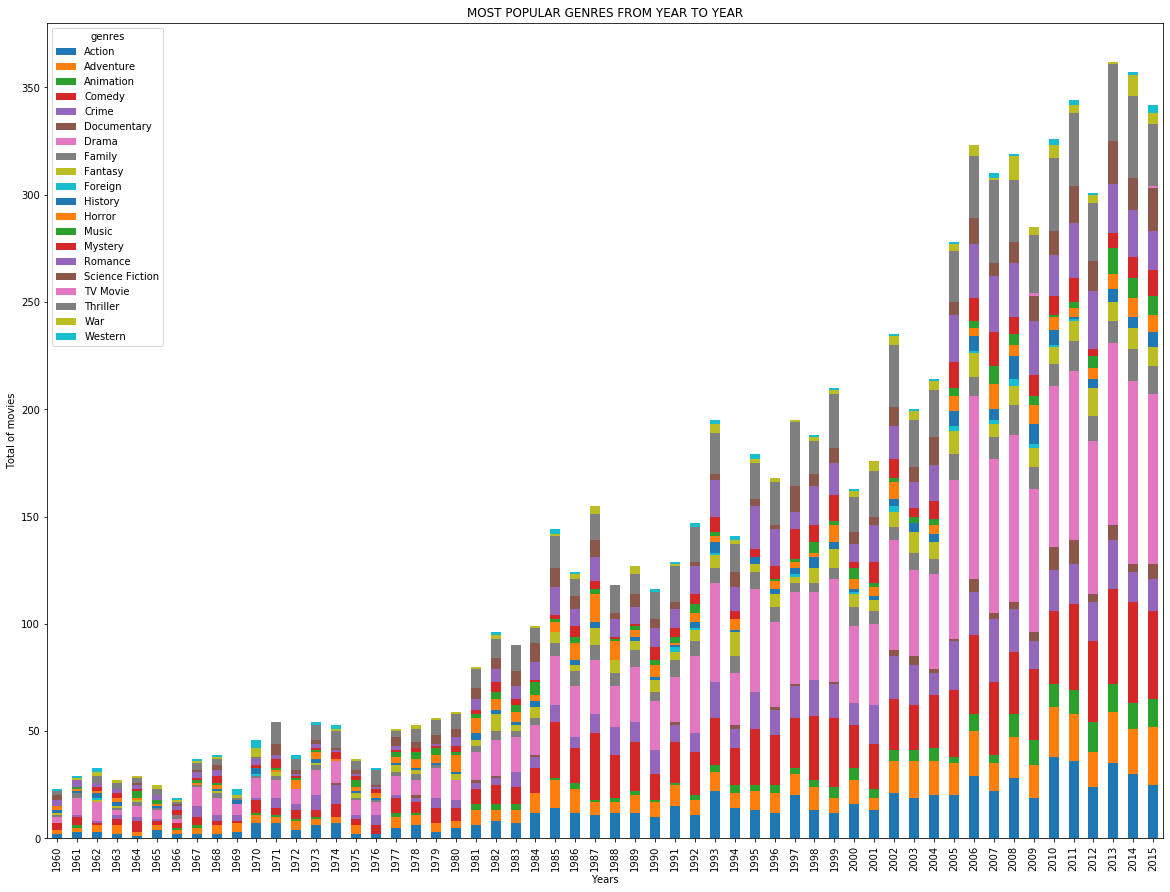

In [170]:
ax = df_mp_unstack.plot(kind='bar', stacked=True, figsize=(20,15))
ax.set_title('MOST POPULAR GENRES FROM YEAR TO YEAR')
ax.set_ylabel('Total of movies')
ax.set_xlabel('Years')

Using a stacked bar chart to plot the genres is the best way to take a quick look at the most popular genres over the years, but there are 2 values __Drama__ and __TV Movie__ that use almost the same color and this is not very clear to the human eye, for this reason let's do another analysis

In [171]:
# Adding a new column with the count by "release_year" and "gender"
df_mp['count'] = df_mp.groupby(['release_year','genres']).genres.transform('count')
df_mp.head()

,genres,release_year,count
0,Action,2015,25
1,Adventure,2015,27
2,Science Fiction,2015,20
3,Thriller,2015,29
4,Action,2015,25


- Get the max() __count__ by __release_year__ and __genres__ to confirm with the previous chart what is the most popular __genres__ from year to year

In [172]:
df_mp.loc[df_mp.groupby(['release_year'])['count'].idxmax()]

,genres,release_year,count
7396,Drama,1960,3
7372,Drama,1961,8
7139,Drama,1962,9
7686,Adventure,1963,4
7171,Drama,1964,5
7936,Action,1965,4
8037,Family,1966,2
7651,Drama,1967,9
7015,Drama,1968,8
7964,Drama,1969,5


Now it's very clear that pink color is associated to __Drama__ movies

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

- Select the movies with the __revenues_adj__ higher than the mean
- Why considering __revenues_adj__ and not __revenues__? Reading the documentation of the dataset explains this:
    _The final two columns endingwith “_adj” show the budget andrevenue of the associated moviein terms of 2010 dollars,accounting for inflation overtime_. This value is more accurate

In [173]:
df_rev = df[df.revenue_adj>=df.revenue_adj.mean()].sort_values(by=['revenue_adj'], ascending=False)
df_rev.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,11000000,775398007,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas],121,"[Adventure, Action, Science Fiction]","[Lucasfilm, Twentieth Century Fox Film Corpora...",3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,200000000,1845034188,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",[James Cameron],194,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,8000000,441306145,The Exorcist,"[Linda Blair, Max von Sydow, Ellen Burstyn, Ja...",[William Friedkin],122,"[Drama, Horror, Thriller]","[Warner Bros., Hoya Productions]",12/26/73,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,7000000,470654000,Jaws,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, ...",[Steven Spielberg],124,"[Horror, Thriller, Adventure]","[Universal Pictures, Zanuck/Brown Productions]",6/18/75,1415,7.3,1975,2.836275e+07,1.907006e+09


#### Directors associated with movies that have high revenues

In [189]:
#create a empty dataframe
df_dir = pd.DataFrame(columns=['director','revenue_adj'])

for index, row in df_rev.iterrows():
    for director in row['director']:
        df_dir = df_dir.append([{'director':director,'revenue_adj':row['revenue_adj']}], ignore_index=True)

Text(0, 0.5, 'Revenues')

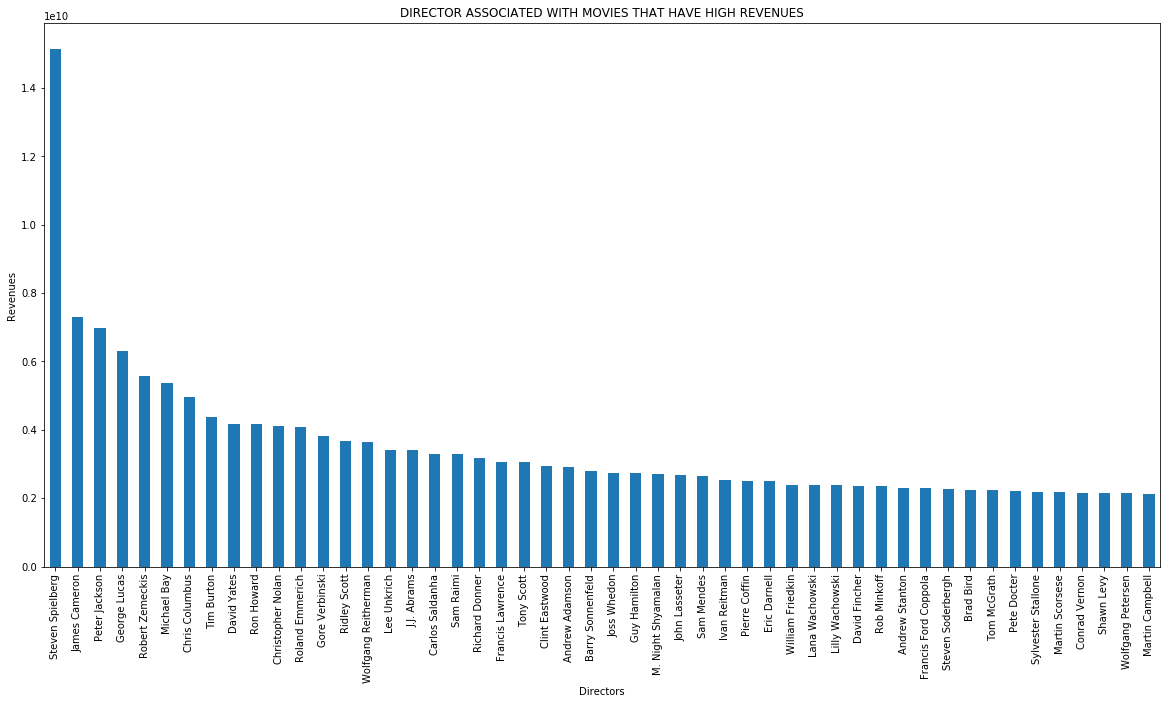

In [190]:
ax = df_dir.groupby('director').revenue_adj.sum().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(20,10))
ax.set_title('DIRECTOR ASSOCIATED WITH MOVIES THAT HAVE HIGH REVENUES')
ax.set_xlabel('Directors')
ax.set_ylabel('Revenues')

Using a bar chart is the best way to find high grossing directors, in this case __Steven Spielberg__ is the most grossing director with a huge difference 

#### Cast associated with movies that have high revenues

In [191]:
#create a empty dataframe
df_cast = pd.DataFrame(columns=['cast','revenue_adj'])

for index, row in df_rev.iterrows():
    for cast in row['cast']:
        df_cast = df_cast.append([{'cast':cast,'revenue_adj':row['revenue_adj']}], ignore_index=True)

Text(0, 0.5, 'Revenues')

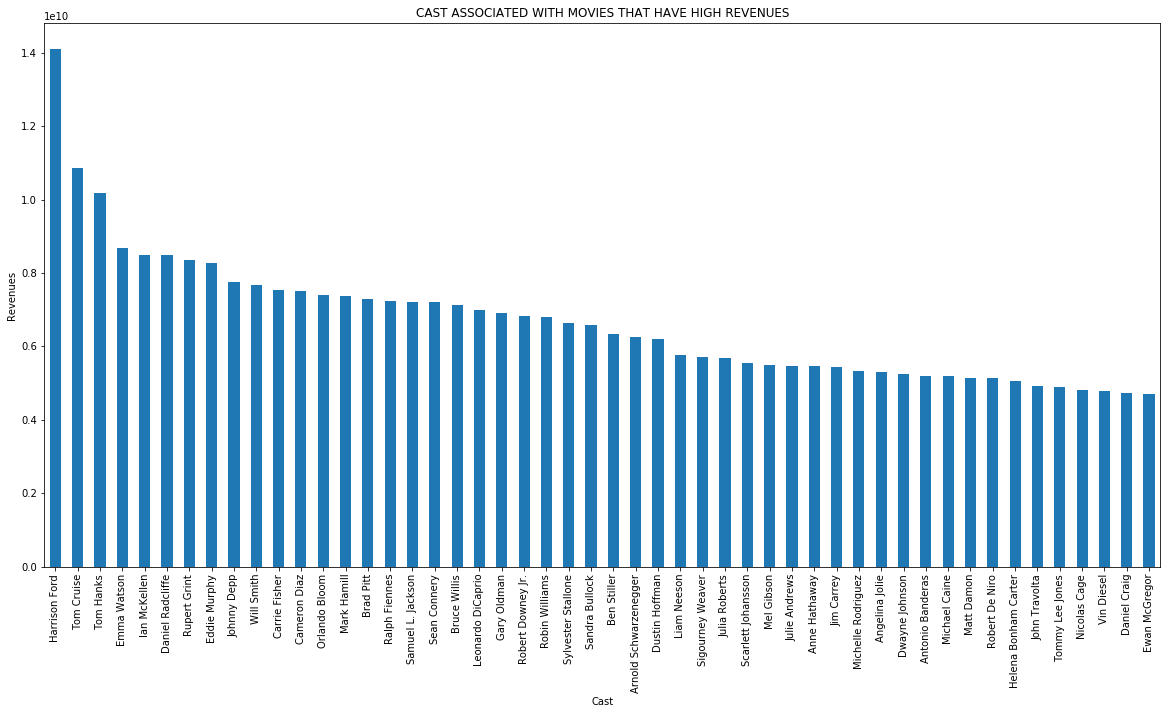

In [192]:
ax = df_cast.groupby('cast').revenue_adj.sum().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(20,10))
ax.set_title('CAST ASSOCIATED WITH MOVIES THAT HAVE HIGH REVENUES')
ax.set_xlabel('Cast')
ax.set_ylabel('Revenues')

It seems __Harrison Ford__ is the high grossing actor with a clear difference over the others.

#### Production Companies associated with movies that have high revenues

In [193]:
#create a empty dataframe
df_pcomp = pd.DataFrame(columns=['production_companies','revenue_adj'])

for index, row in df_rev.iterrows():
    for pcomp in row['production_companies']:
        df_pcomp = df_pcomp.append([{'production_companies':pcomp,'revenue_adj':row['revenue_adj']}], ignore_index=True)

Text(0, 0.5, 'Revenues')

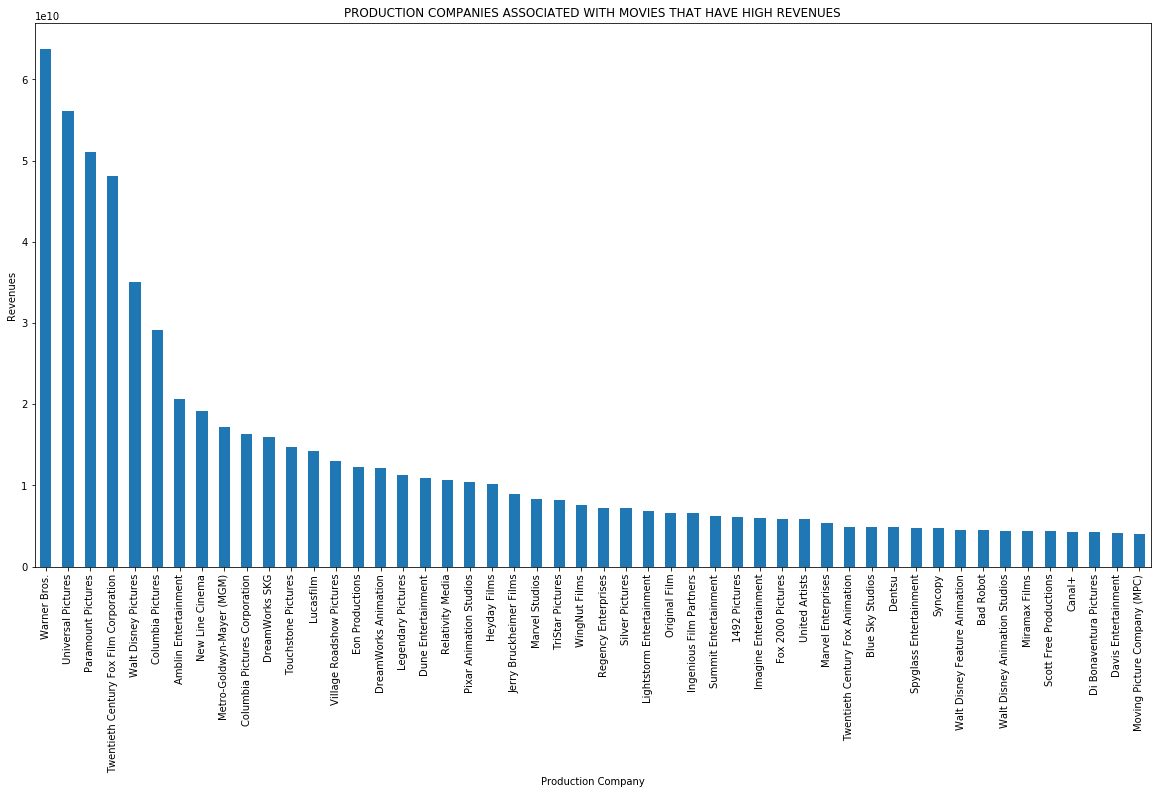

In [196]:
ax = df_pcomp.groupby('production_companies').revenue_adj.sum().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(20,10))
ax.set_title('PRODUCTION COMPANIES ASSOCIATED WITH MOVIES THAT HAVE HIGH REVENUES')
ax.set_xlabel('Production Company')
ax.set_ylabel('Revenues')

This bar chart presents the high grossing production companies and it's very clear there are 4 or 6 companies that produces the movies that have high revenues, like __Warner Bros__, __Univeral Pictures__, __Paramaount Picture__, __Century Fox Film__ and __Walt Disney Pictures__

#### Correlation between another variables and movies that have high revenues

To analyze better the correlation between other variables and the revenues, it's better to create a DF with the values to be analyze and create a scatter plot matrix, to check them is a very quick view

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BDE0C6EB8>,
      dtype=object)

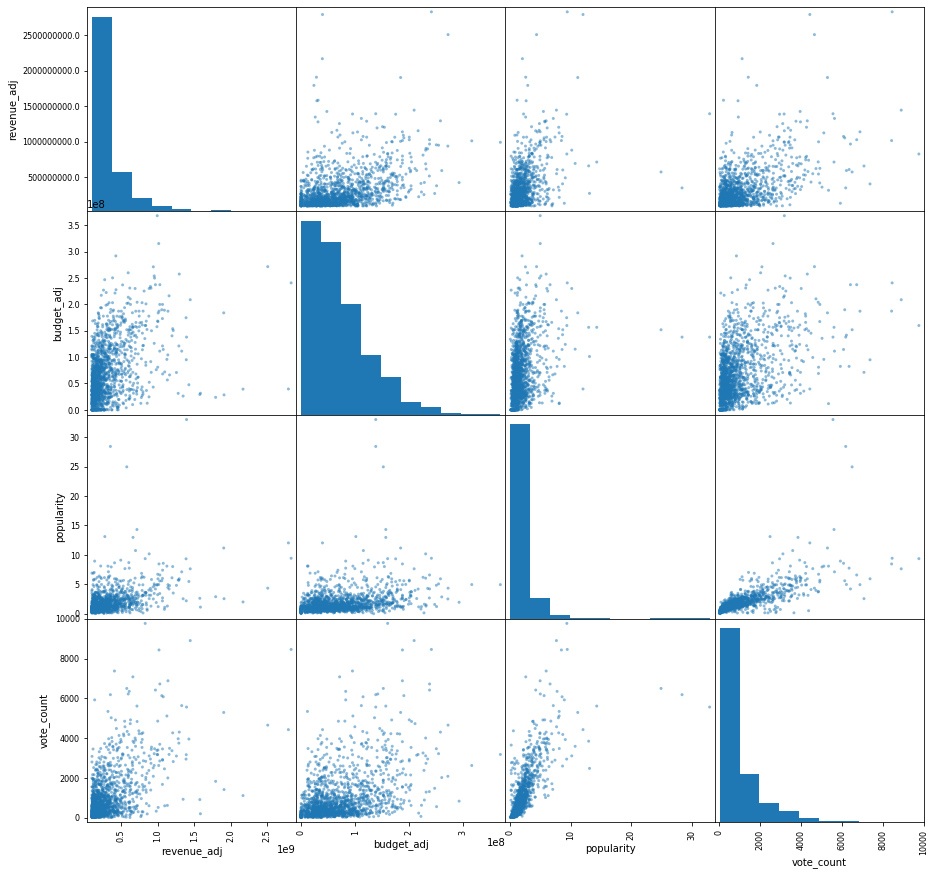

In [180]:
pd.plotting.scatter_matrix(df_rev.loc[:,['revenue_adj', 'budget_adj', 'popularity','vote_count']], figsize=(15,15))

It's very clear there is a strong positive correlation between these variables

### Research Question 3  (What is the top 5 of the best movies ever?)

To select the top 5 of the best movies ever, I considered the variables __popularity__, __vote_average__ and __vote_average__

Text(0, 0.5, 'Popularity')

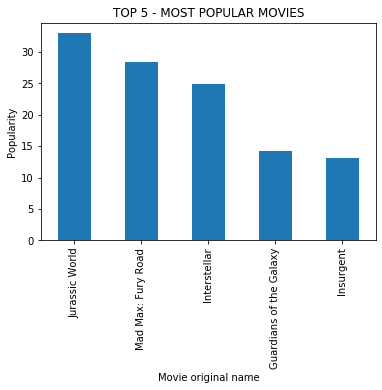

In [181]:
ax = df.groupby('original_title').popularity.sum().sort_values(ascending=False).head(5).plot(kind='bar')
ax.set_title('TOP 5 - MOST POPULAR MOVIES')
ax.set_xlabel('Movie original name')
ax.set_ylabel('Popularity')

__Jurassic World__ is the most popular movie

Text(0, 0.5, 'Vote count')

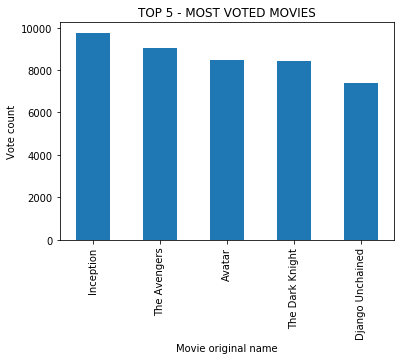

In [182]:
ax = df.groupby('original_title').vote_count.sum().sort_values(ascending=False).head(5).plot(kind='bar')
ax.set_title('TOP 5 - MOST VOTED MOVIES')
ax.set_xlabel('Movie original name')
ax.set_ylabel('Vote count')

It can be appreciated that __Inception__ is the most voted movie, but the other movies are very near to the first one.

Text(0, 0.5, 'Vote average')

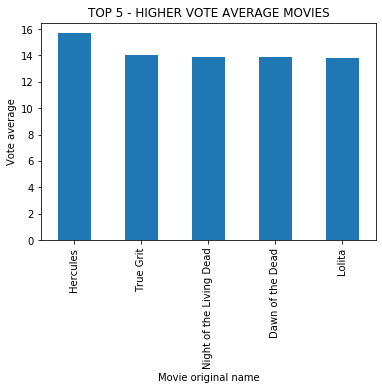

In [183]:
ax = df.groupby('original_title').vote_average.sum().sort_values(ascending=False).head(5).plot(kind='bar')
ax.set_title('TOP 5 - HIGHER VOTE AVERAGE MOVIES')
ax.set_xlabel('Movie original name')
ax.set_ylabel('Vote average')

__Hercules__ is the movie with the higher vote average but for the other ones the result is very tight

<a id='conclusions'></a>
## Conclusions

- It seems the most popular genre over the years is __Drama__

- It can be apprecited the movies that have high revenues are produced by __Warner Bros__ company or directed by __Steven Spielberg__ or starring __Harrison Ford__ 

- It seems there is strong positive correlation between the movies that have high revenues and the __budget_adj__, __popularity__ and __vote_count__

- And for the last, about the top 5 of best movies ever considering this dataset depends of certains variables, for example the movie most popular is __Jurassic World__, the movie most voted is __Inception__ and the movie with the higher vote average is __Hercules__

- There was some limitations during the analysis, for example not only the __cast__ and __genres__ contains multiple values separated by __"|"__ also the __production_company__ has multiples values. 

- About movies with empty __revenue__ and __budget__ may cause confusion, so it's better to get rid of them

- Another limitation was the __release_year__ that was a string and trying to plot the __MOST POPULAR GENRES FROM YEAR TO YEAR__ was not sorted out properly, for this reason the __release_year__ was converted to "Int"

- For the last, I can consider this dataset as an effective representation of the population because I could draw some samples and obtain some important conclusions